In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import nltk
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
pd.options.display.max_colwidth = 10000


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LPras\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
file = 'cleantweets.csv'
df = pd.read_csv(file, sep=';').dropna(subset=['state'])
df['text'] = df['text'].str.lower()

C:\Users\LPras\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (0,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
len(df)

9447802

In [6]:
# Check terms
df_trump = df[df['text'].str.contains('trump')]
df_biden = df[df['text'].str.contains('biden')]

In [7]:
df_trump

,id,text,retweet_count,favorite_count,date,verified,state
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida
...,...,...,...,...,...,...,...
9447824,1323369262308753408,rt @watchchad: hollywood released a list of celebrities leaving if trump wins. \n\ni’ve compiled a list of people who give a damn:\n\n1.,1380.0,0,11-02-20,False,California
9447827,1323369265978843138,@bestsongiheard i blame trump,0.0,1,11-02-20,False,Indiana
9447828,1323369266045980675,rt @kasie: just a scathing column from gop lawyer ben ginsberg — calling trump tactics “un- american”:\n\n“proof of systematic fraud has beco…,707.0,0,11-02-20,False,Texas
9447830,1323369266117332992,@theonion you guys at the onion have to try harder. this one is entirely believable.\n\ni feel bad for you - you're lucky that trump hasn't completely put you out of business!,0.0,3,11-02-20,False,Pennsylvania


In [8]:
df_biden

,id,text,retweet_count,favorite_count,date,verified,state
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts
9,1319111213368881153,#soeakupvotebiden \ni voted biden at my clerk's office. #michigan\n#vote https://t.co/gran5h2rzs,0.0,2,10-22-03,False,Michigan
11,1319111217332416512,"rt @jackposobiec: the fbi just confirmed iran ran a false flag campaign to help joe biden by posing as the proud boys \n\nmany, many members…",6779.0,0,10-22-03,False,Nevada
16,1319111221472333824,"rt @kylegriffin1: billy graham's granddaughter has endorsed joe biden.\n\n""the jesus we serve promotes kindness, dignity, humility, and this…",5967.0,0,10-22-03,False,Florida
...,...,...,...,...,...,...,...
9447817,1323369258521251840,rt @timcast: i think its funny that people across the country are preparing for mass leftist riots and would also vote for joe biden whose…,4103.0,0,11-02-20,False,North Dakota
9447820,1323369262099189763,rt @jimtankersley: a key diff for dems in 2020 vs. 2016: joe biden has quietly kept both his left flank and wall st from rebelling against…,130.0,0,11-02-20,True,Georgia
9447821,1323369262141054976,rt @realdonaldtrump: biden will raise your taxes (biggest increase ever!).,12175.0,0,11-02-20,False,Illinois
9447831,1323369266251444233,rt @joebiden: are you still undecided about who to vote for or know someone who is? my team put together some cheat sheets to show where do…,18719.0,0,11-02-20,False,Maine


In [9]:
# how many tweets for each candidate per state - todo
# Concat the data frames
df_trump['candidate'] = 'Trump'
df_biden['candidate'] = 'Biden'
Data_Mixed = pd.concat([df_trump,df_biden])
Data_Mixed

C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\2758347014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump['candidate'] = 'Trump'
C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\2758347014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biden['candidate'] = 'Biden'


,id,text,retweet_count,favorite_count,date,verified,state,candidate
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania,Trump
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey,Trump
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,Trump
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,Trump
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida,Trump
...,...,...,...,...,...,...,...,...
9447817,1323369258521251840,rt @timcast: i think its funny that people across the country are preparing for mass leftist riots and would also vote for joe biden whose…,4103.0,0,11-02-20,False,North Dakota,Biden
9447820,1323369262099189763,rt @jimtankersley: a key diff for dems in 2020 vs. 2016: joe biden has quietly kept both his left flank and wall st from rebelling against…,130.0,0,11-02-20,True,Georgia,Biden
9447821,1323369262141054976,rt @realdonaldtrump: biden will raise your taxes (biggest increase ever!).,12175.0,0,11-02-20,False,Illinois,Biden
9447831,1323369266251444233,rt @joebiden: are you still undecided about who to vote for or know someone who is? my team put together some cheat sheets to show where do…,18719.0,0,11-02-20,False,Maine,Biden


In [10]:
 # Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','candidate'])['text'].count().sort_values(ascending=False).head(20).reset_index()
state_df

,state,candidate,text
0,California,Trump,610658
1,Texas,Trump,449521
2,Florida,Trump,430795
3,California,Biden,362995
4,New York,Trump,313937
5,Texas,Biden,278584
6,Florida,Biden,248734
7,Washington,Trump,190120
8,New York,Biden,187866
9,Pennsylvania,Trump,159061


In [12]:
import seaborn as sns

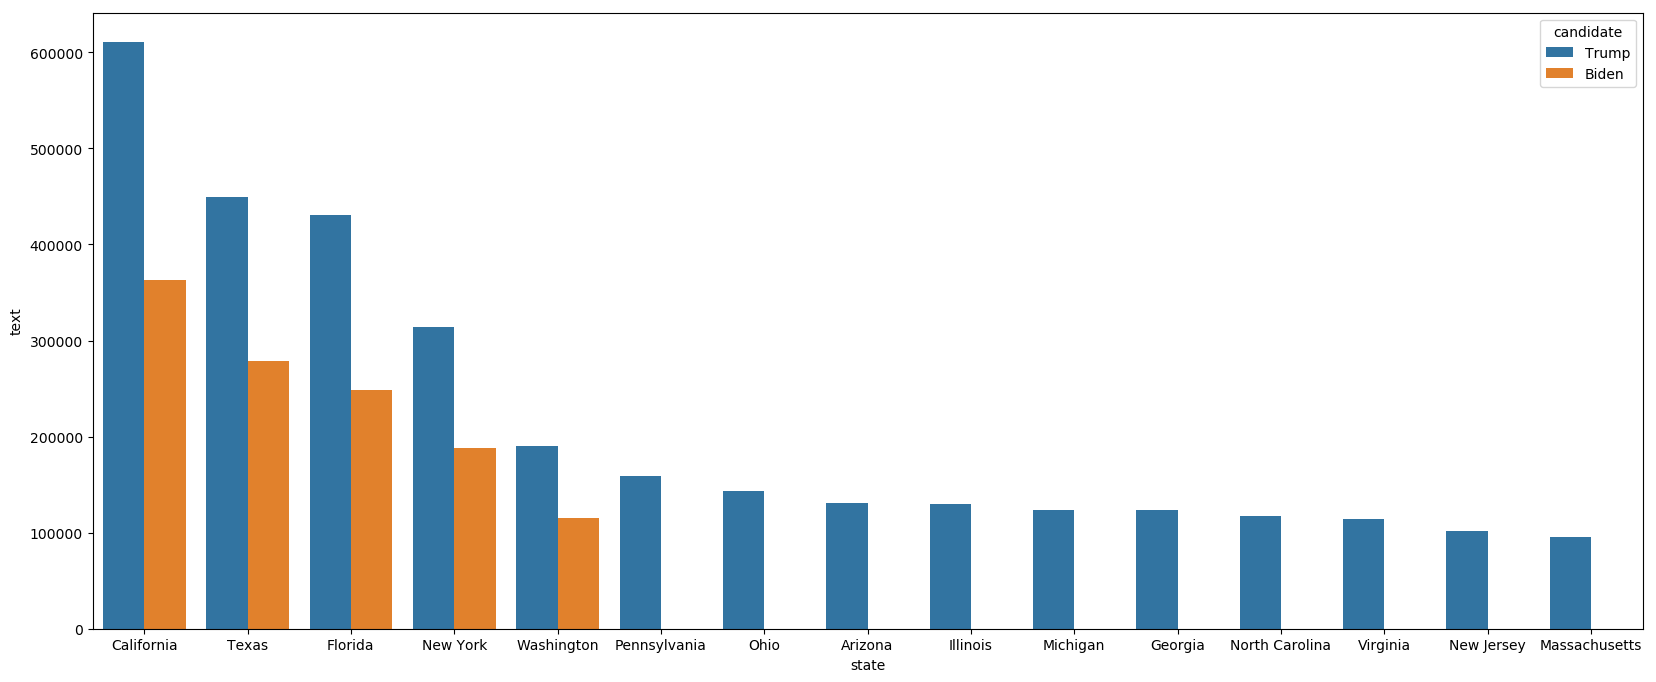

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='text',hue='candidate')
plt.show()

# Vader sentiment analysis

In [15]:
# Run the sentiment analysis for both trump and biden
def sentimentVerdict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

print('start biden')
df_biden['sentiment_scores'] = df_biden['text'].apply(lambda x: sid.polarity_scores(x))
df_biden['sentiment'] = df_biden['sentiment_scores'].apply(lambda x: sentimentVerdict(x))
print('start trump')
df_trump['sentiment_scores'] = df_trump['text'].apply(lambda x: sid.polarity_scores(x))
df_trump['sentiment'] = df_trump['sentiment_scores'].apply(lambda x: sentimentVerdict(x)) 

start biden


C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\1420808943.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biden['sentiment_scores'] = df_biden['text'].apply(lambda x: sid.polarity_scores(x))
C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\1420808943.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biden['sentiment'] = df_biden['sentiment_scores'].apply(lambda x: sentimentVerdict(x))


start trump


C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\1420808943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump['sentiment_scores'] = df_trump['text'].apply(lambda x: sid.polarity_scores(x))
C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\1420808943.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump['sentiment'] = df_trump['sentiment_scores'].apply(lambda x: sentimentVerdict(x))


In [16]:
print(df_biden['sentiment'].value_counts())

Positive    1062878
Neutral      868226
Negative     758900
Name: sentiment, dtype: int64


In [17]:
df_biden.head()

,id,text,retweet_count,favorite_count,date,verified,state,candidate,sentiment_scores,sentiment
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,Biden,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,Biden,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
9,1319111213368881153,#soeakupvotebiden \ni voted biden at my clerk's office. #michigan\n#vote https://t.co/gran5h2rzs,0.0,2,10-22-03,False,Michigan,Biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
11,1319111217332416512,"rt @jackposobiec: the fbi just confirmed iran ran a false flag campaign to help joe biden by posing as the proud boys \n\nmany, many members…",6779.0,0,10-22-03,False,Nevada,Biden,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.7003}",Positive
16,1319111221472333824,"rt @kylegriffin1: billy graham's granddaughter has endorsed joe biden.\n\n""the jesus we serve promotes kindness, dignity, humility, and this…",5967.0,0,10-22-03,False,Florida,Biden,"{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.8442}",Positive


In [18]:
print(df_trump['sentiment'].value_counts())

Positive    1817010
Negative    1558361
Neutral     1134048
Name: sentiment, dtype: int64


In [19]:
df_trump.head()

,id,text,retweet_count,favorite_count,date,verified,state,candidate,sentiment_scores,sentiment
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania,Trump,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.6249}",Positive
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey,Trump,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,Trump,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,Trump,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida,Trump,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral


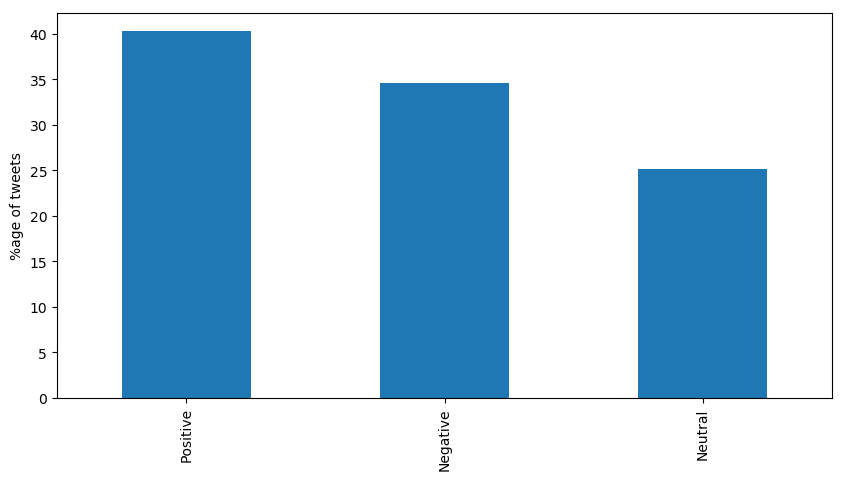

In [20]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(df_trump['sentiment'].value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

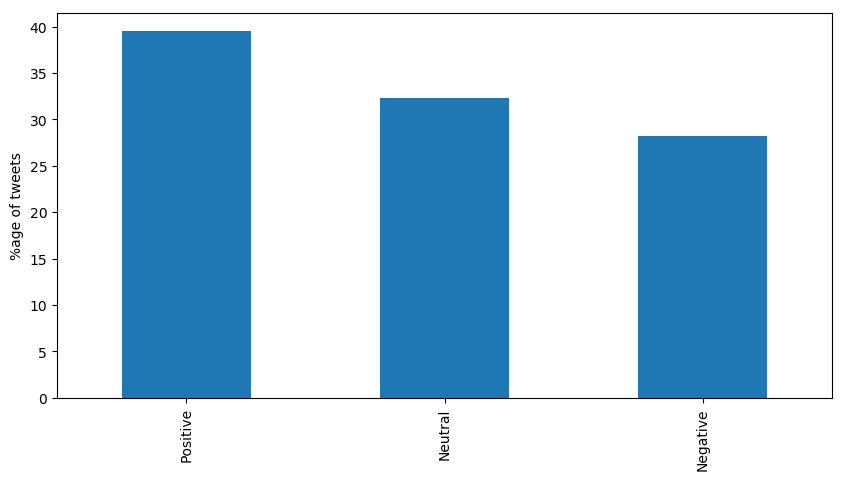

In [21]:
# Plot graph for analysis of Biden Tweets
plt.figure(figsize=(10,5)) 
(df_biden['sentiment'].value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

In [22]:
# Concat the data frames
df_trump['candidate'] = 'Trump'
df_biden['candidate'] = 'Biden'
Data_Mixed = pd.concat([df_trump,df_biden])
Data_Mixed

C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\1357478852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump['candidate'] = 'Trump'
C:\Users\LPras\AppData\Local\Temp\ipykernel_22248\1357478852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biden['candidate'] = 'Biden'


,id,text,retweet_count,favorite_count,date,verified,state,candidate,sentiment_scores,sentiment
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania,Trump,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.6249}",Positive
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey,Trump,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,Trump,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,Trump,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida,Trump,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
...,...,...,...,...,...,...,...,...,...,...
9447817,1323369258521251840,rt @timcast: i think its funny that people across the country are preparing for mass leftist riots and would also vote for joe biden whose…,4103.0,0,11-02-20,False,North Dakota,Biden,"{'neg': 0.117, 'neu': 0.78, 'pos': 0.103, 'compound': -0.1027}",Negative
9447820,1323369262099189763,rt @jimtankersley: a key diff for dems in 2020 vs. 2016: joe biden has quietly kept both his left flank and wall st from rebelling against…,130.0,0,11-02-20,True,Georgia,Biden,"{'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.2732}",Negative
9447821,1323369262141054976,rt @realdonaldtrump: biden will raise your taxes (biggest increase ever!).,12175.0,0,11-02-20,False,Illinois,Biden,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3802}",Positive
9447831,1323369266251444233,rt @joebiden: are you still undecided about who to vote for or know someone who is? my team put together some cheat sheets to show where do…,18719.0,0,11-02-20,False,Maine,Biden,"{'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.5994}",Negative


# Sentiment % pos neg

In [252]:
overview_df = pd.DataFrame()
overview_df['state'] = Data_Mixed.state.unique()

#total number of tweets
overview_df = overview_df.merge(Data_Mixed.groupby('state')['id'].count().reset_index(name="total_tweets"), on='state', how='left')

#Number of tweets for Trump
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Trump') &
                                 (Data_Mixed['sentiment'] == 'Positive')].groupby('state')['id'].count().reset_index(name="Trump_P"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Trump') &
                                 (Data_Mixed['sentiment'] == 'Negative')].groupby('state')['id'].count().reset_index(name="Trump_N"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Trump') &
                                 (Data_Mixed['sentiment'] == 'Neutral')].groupby('state')['id'].count().reset_index(name="Trump_Na"), on='state', how='left')
#Number of tweets for Biden
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Biden') &
                                 (Data_Mixed['sentiment'] == 'Positive')].groupby('state')['id'].count().reset_index(name="Biden_P"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Biden') &
                                 (Data_Mixed['sentiment'] == 'Negative')].groupby('state')['id'].count().reset_index(name="Biden_N"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Biden') &
                                 (Data_Mixed['sentiment'] == 'Neutral')].groupby('state')['id'].count().reset_index(name="Biden_Na"), on='state', how='left')

overview_df

,state,total_tweets,Trump_P,Trump_N,Trump_Na,Biden_P,Biden_N,Biden_Na
0,Pennsylvania,254404,63484,55171,40406,38226,26713,30404
1,New Jersey,162481,40968,35375,25372,24350,17160,19256
2,Colorado,143612,35116,33106,22356,21400,14664,16970
3,Massachusetts,153022,36289,35300,23833,23821,15550,18229
4,Florida,679529,182091,140167,108537,93633,74465,80636
5,Minnesota,106348,25830,24066,16846,16114,10804,12688
6,California,973653,237889,219873,152896,148577,97989,116429
7,Washington,305040,72305,68692,49123,47588,30219,37113
8,South Carolina,91249,24328,18559,14370,12768,10083,11141
9,Nevada,87471,22671,18780,13695,12656,9310,10359


In [253]:
# Positive tweets perc of total number of tweets
overview_df['Trump_P_perc_total'] = overview_df['Trump_P'] / overview_df['total_tweets']
overview_df['Biden_P_perc_total'] = overview_df['Biden_P'] / overview_df['total_tweets']

# Positive tweets perc of numver of tweets of each candidate
overview_df['Trump_P_perc_only'] = overview_df['Trump_P'] / (overview_df['Trump_P'] + overview_df['Trump_N'] + overview_df['Trump_Na'])
overview_df['Biden_P_perc_only'] = overview_df['Biden_P'] / (overview_df['Biden_P'] + overview_df['Biden_N'] + overview_df['Biden_Na'])

overview_df


,state,total_tweets,Trump_P,Trump_N,Trump_Na,Biden_P,Biden_N,Biden_Na,Trump_P_perc_total,Biden_P_perc_total,Trump_P_perc_only,Biden_P_perc_only
0,Pennsylvania,254404,63484,55171,40406,38226,26713,30404,0.249540,0.150257,0.399117,0.400931
1,New Jersey,162481,40968,35375,25372,24350,17160,19256,0.252140,0.149864,0.402772,0.400718
2,Colorado,143612,35116,33106,22356,21400,14664,16970,0.244520,0.149013,0.387688,0.403515
3,Massachusetts,153022,36289,35300,23833,23821,15550,18229,0.237149,0.155670,0.380300,0.413559
4,Florida,679529,182091,140167,108537,93633,74465,80636,0.267966,0.137791,0.422686,0.376438
5,Minnesota,106348,25830,24066,16846,16114,10804,12688,0.242882,0.151521,0.387013,0.406858
6,California,973653,237889,219873,152896,148577,97989,116429,0.244326,0.152597,0.389562,0.409309
7,Washington,305040,72305,68692,49123,47588,30219,37113,0.237034,0.156006,0.380312,0.414097
8,South Carolina,91249,24328,18559,14370,12768,10083,11141,0.266611,0.139925,0.424891,0.375618
9,Nevada,87471,22671,18780,13695,12656,9310,10359,0.259183,0.144688,0.411109,0.391524


In [254]:
# states codes for the map figure
stateMapping = {}
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
stateMapping['state']= states
stateMapping['state_code'] = stateCodes 
overview_df = overview_df.merge(pd.DataFrame.from_dict(stateMapping), on='state', how='left')
overview_df


,state,total_tweets,Trump_P,Trump_N,Trump_Na,Biden_P,Biden_N,Biden_Na,Trump_P_perc_total,Biden_P_perc_total,Trump_P_perc_only,Biden_P_perc_only,state_code
0,Pennsylvania,254404,63484,55171,40406,38226,26713,30404,0.249540,0.150257,0.399117,0.400931,PA
1,New Jersey,162481,40968,35375,25372,24350,17160,19256,0.252140,0.149864,0.402772,0.400718,NJ
2,Colorado,143612,35116,33106,22356,21400,14664,16970,0.244520,0.149013,0.387688,0.403515,CO
3,Massachusetts,153022,36289,35300,23833,23821,15550,18229,0.237149,0.155670,0.380300,0.413559,MA
4,Florida,679529,182091,140167,108537,93633,74465,80636,0.267966,0.137791,0.422686,0.376438,FL
5,Minnesota,106348,25830,24066,16846,16114,10804,12688,0.242882,0.151521,0.387013,0.406858,MN
6,California,973653,237889,219873,152896,148577,97989,116429,0.244326,0.152597,0.389562,0.409309,CA
7,Washington,305040,72305,68692,49123,47588,30219,37113,0.237034,0.156006,0.380312,0.414097,WA
8,South Carolina,91249,24328,18559,14370,12768,10083,11141,0.266611,0.139925,0.424891,0.375618,SC
9,Nevada,87471,22671,18780,13695,12656,9310,10359,0.259183,0.144688,0.411109,0.391524,NV


In [255]:
overview_df['predicted_winner'] = np.where(overview_df['Trump_P_perc_only'] > overview_df['Biden_P_perc_only'], 'Trump', 'Biden')
fig = px.choropleth(overview_df, color='predicted_winner', locations='state_code', locationmode="USA-states", scope="usa")
fig.show()

# 2020 Election Real Result

In [256]:
df =  pd.read_csv('finalResult.csv', lineterminator='\n')
df = df.drop(['State'], axis=1)
df = df.rename(columns={'newST': 'State'})
df['Won election'] = df['won'].str.replace("T", "Trump").replace("B", "Biden")
#to get biden as blue 
d = {0: 2, 2: 0}
df = df.rename(d).sort_index()
#unnessarcy row
df = df.drop([52])

In [257]:
real_result =  pd.read_csv('finalResult.csv', lineterminator='\n')

real_result = real_result.drop(['State'], axis=1)

real_result = real_result.rename(columns={'newST': 'state_code'})
real_result['winner'] = real_result['won'].str.replace("T", "Trump").replace("B", "Biden")
#to get biden as blue 
d = {0: 2, 2: 0}
real_result = real_result.rename(d).sort_index()
#unnessarcy row
real_result = real_result.drop([52])
real_result



,Unnamed: 0,state_code,won,color,newcolor\r,winner
0,2.0,AZ,B,4,-3,Biden
1,1.0,AK,T,0,0,Trump
2,0.0,AL,T,0,0,Trump
3,3.0,AR,T,0,0,Trump
4,4.0,CA,B,-5,-5,Biden
5,5.0,CO,B,-5,-5,Biden
6,6.0,CT,B,-5,-5,Biden
7,7.0,DE,B,-5,-5,Biden
8,8.0,DC,B,-5,-5,Biden
9,9.0,FL,T,4,-1,Trump


In [258]:
overview_df = overview_df.merge(real_result[["state_code", "winner"]], on='state_code', how='left')

,state,total_tweets,Trump_P,Trump_N,Trump_Na,Biden_P,Biden_N,Biden_Na,Trump_P_perc_total,Biden_P_perc_total,Trump_P_perc_only,Biden_P_perc_only,state_code,predicted_winner,winner
0,Pennsylvania,254404,63484,55171,40406,38226,26713,30404,0.249540,0.150257,0.399117,0.400931,PA,Biden,Biden
1,New Jersey,162481,40968,35375,25372,24350,17160,19256,0.252140,0.149864,0.402772,0.400718,NJ,Trump,Biden
2,Colorado,143612,35116,33106,22356,21400,14664,16970,0.244520,0.149013,0.387688,0.403515,CO,Biden,Biden
3,Massachusetts,153022,36289,35300,23833,23821,15550,18229,0.237149,0.155670,0.380300,0.413559,MA,Biden,Biden
4,Florida,679529,182091,140167,108537,93633,74465,80636,0.267966,0.137791,0.422686,0.376438,FL,Trump,Trump
5,Minnesota,106348,25830,24066,16846,16114,10804,12688,0.242882,0.151521,0.387013,0.406858,MN,Biden,Biden
6,California,973653,237889,219873,152896,148577,97989,116429,0.244326,0.152597,0.389562,0.409309,CA,Biden,Biden
7,Washington,305040,72305,68692,49123,47588,30219,37113,0.237034,0.156006,0.380312,0.414097,WA,Biden,Biden
8,South Carolina,91249,24328,18559,14370,12768,10083,11141,0.266611,0.139925,0.424891,0.375618,SC,Trump,Trump
9,Nevada,87471,22671,18780,13695,12656,9310,10359,0.259183,0.144688,0.411109,0.391524,NV,Trump,Biden


# 

In [259]:
fig = px.choropleth(real_result, color='winner', locations="state_code", locationmode="USA-states", scope="usa")
fig.show()

In [260]:
overview_df["correct"] = np.where(overview_df["predicted_winner"] == overview_df["winner"], 1, 0)
accuracy = np.sum(overview_df["correct"]) / len(overview_df["correct"])
print(accuracy)

0.82


In [261]:
"""
overview_df['predicted_winner'] = np.where(overview_df["Trump_P"] + overview_df["Biden_N"] > 
                                           overview_df["Biden_P"] + overview_df["Trump_N"], 'Trump', 'Biden')

overview_df["correct"] = np.where(overview_df["predicted_winner"] == overview_df["winner"], 1, 0)
accuracy = np.sum(overview_df["correct"]) / len(overview_df["correct"])
print('Accuracy % : ',accuracy*100)
fig = px.choropleth(overview_df, color='predicted_winner', locations='state_code', locationmode="USA-states", scope="usa")
fig.show()
"""


'\noverview_df[\'predicted_winner\'] = np.where(overview_df["Trump_P"] + overview_df["Biden_N"] > \n                                           overview_df["Biden_P"] + overview_df["Trump_N"], \'Trump\', \'Biden\')\n\noverview_df["correct"] = np.where(overview_df["predicted_winner"] == overview_df["winner"], 1, 0)\naccuracy = np.sum(overview_df["correct"]) / len(overview_df["correct"])\nprint(\'Accuracy % : \',accuracy*100)\nfig = px.choropleth(overview_df, color=\'predicted_winner\', locations=\'state_code\', locationmode="USA-states", scope="usa")\nfig.show()\n'

In [262]:
"""
# Negative tweets perc of total number of tweets
overview_df['Trump_N_perc_total'] = overview_df['Trump_N'] / overview_df['total_tweets']
overview_df['Biden_N_perc_total'] = overview_df['Biden_N'] / overview_df['total_tweets']

# Negative tweets perc of numver of tweets of each candidate
overview_df['Trump_N_perc_only'] = overview_df['Trump_N'] / (overview_df['Trump_P'] + overview_df['Trump_N'] + overview_df['Trump_Na'])
overview_df['Biden_N_perc_only'] = overview_df['Biden_N'] / (overview_df['Biden_P'] + overview_df['Biden_N'] + overview_df['Biden_Na'])
"""




"\n# Negative tweets perc of total number of tweets\noverview_df['Trump_N_perc_total'] = overview_df['Trump_N'] / overview_df['total_tweets']\noverview_df['Biden_N_perc_total'] = overview_df['Biden_N'] / overview_df['total_tweets']\n\n# Negative tweets perc of numver of tweets of each candidate\noverview_df['Trump_N_perc_only'] = overview_df['Trump_N'] / (overview_df['Trump_P'] + overview_df['Trump_N'] + overview_df['Trump_Na'])\noverview_df['Biden_N_perc_only'] = overview_df['Biden_N'] / (overview_df['Biden_P'] + overview_df['Biden_N'] + overview_df['Biden_Na'])\n"

In [263]:
"""
overview_df['predicted_winner'] = np.where(overview_df["Trump_N_perc_only"] > 
                                            overview_df["Biden_N_perc_only"], 'Biden', 'Trump')

print(overview_df)
fig = px.choropleth(overview_df, color='predicted_winner', locations='state_code', locationmode="USA-states", scope="usa")
fig.show()
overview_df["correct"] = np.where(overview_df["predicted_winner"] == overview_df["winner"], 1, 0)
accuracy = np.sum(overview_df["correct"]) / len(overview_df["correct"])
print(accuracy)
"""

'\noverview_df[\'predicted_winner\'] = np.where(overview_df["Trump_N_perc_only"] > \n                                            overview_df["Biden_N_perc_only"], \'Biden\', \'Trump\')\n\nprint(overview_df)\nfig = px.choropleth(overview_df, color=\'predicted_winner\', locations=\'state_code\', locationmode="USA-states", scope="usa")\nfig.show()\noverview_df["correct"] = np.where(overview_df["predicted_winner"] == overview_df["winner"], 1, 0)\naccuracy = np.sum(overview_df["correct"]) / len(overview_df["correct"])\nprint(accuracy)\n'

# Part Laurens 


# Real elections with swing states

In [264]:
df =  pd.read_csv('finalResult.csv', lineterminator='\n')
df = df.drop(['State'], axis=1)
df = df.rename(columns={'newST': 'State'})
df['Won election'] = df['won'].str.replace("T", "Trump").replace("B", "Biden")
#unnessarcy row
df = df.drop([52])

#we consider it a swing state if during the real election there was a difference of less than 5 %
#Arizona -> biden, florida -> Trump, Georiga -> Biden, Michigan -> Biden, Nevada -> Biden, North carolina -> Trump
#, Pennysilvina _ biden, wisconsin -> Biden
df['Won election 2'] = df['Won election']
df.loc[df['State'] == 'AZ' ,['Won election 2']] = 'Swing state to Biden'
df.loc[df['State'] == 'GA' ,['Won election 2']] = 'Swing state to Biden'
df.loc[df['State'] == 'MI' ,['Won election 2']] = 'Swing state to Biden'
df.loc[df['State'] == 'NV' ,['Won election 2']] = 'Swing state to Biden'
df.loc[df['State'] == 'PA' ,['Won election 2']] = 'Swing state to Biden'
df.loc[df['State'] == 'WI' ,['Won election 2']] = 'Swing state to Biden'
df.loc[df['State'] == 'FL' ,['Won election 2']] = 'Swing state to Trump'
df.loc[df['State'] == 'NC' ,['Won election 2']] = 'Swing state to Trump'

In [265]:
fig = px.choropleth(locations=df['State'], 
                    locationmode="USA-states",
                    color=df['Won election 2'],
                    color_discrete_map={'Trump':'rgb(200, 0, 0)', 'Swing state to Trump': 'rgb(300, 40, 40)', 'Biden':'rgb(0, 0, 200)', 'Swing state to Biden': 'rgb(40, 40, 300)'},scope="usa"
                   )

fig.update_layout(legend={'title_text':''})
fig.show()

# Our results with swing states

In [266]:
test = overview_df['Trump_P_perc_only'] - overview_df['Biden_P_perc_only']
#print(test2)
#Swing state trump
test2 = (test < 0.005) & (test > 0)
indices_trump = test2.index.values[test2==True]
#Swing state biden
test3 = (test > -0.005) & (test < 0)
indices_biden = test2.index.values[test3==True]


overview_df['predicted_winner_swing'] = overview_df['predicted_winner']

overview_df['predicted_winner_swing'].loc[indices_trump] = 'Swing state to Trump'
overview_df['predicted_winner_swing'].loc[indices_biden] = 'Swing state to Biden'

C:\Users\LPras\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
fig = px.choropleth(locations=overview_df['state_code'], 
                    locationmode="USA-states",
                    color=overview_df['predicted_winner_swing'],
                    color_discrete_map={'Trump':'rgb(200, 0, 0)', 'Swing state to Trump': 'rgb(300, 40, 40)', 'Biden':'rgb(0, 0, 200)', 'Swing state to Biden': 'rgb(40, 40, 300)'},scope="usa"
                   )

fig.update_layout(legend={'title_text':''})
fig.show()

# Results in our election

In [299]:
stateElectoral = {}
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Electoral_votes = [9, 3, 11, 6, 55, 9, 7, 3, 29, 16, 4, 4, 20, 11, 6, 6, 8, 8, 4, 10, 11, 16, 10, 6, 10, 3, 5, 6, 4, 14, 5, 29, 15, 3, 18, 7, 7, 20, 4, 9, 3, 11, 38, 6, 3, 13, 12, 5, 10, 3]
stateElectoral['state']= states

stateElectoral['Electoral votes'] = Electoral_votes
#pd.DataFrame.from_dict(stateElectoral), on='state', how='left'
overview_df = overview_df.merge(pd.DataFrame.from_dict(stateElectoral), on='state', how='left')

In [300]:
sum(overview_df[overview_df['predicted_winner']=='Trump']['Electoral votes'])

265

In [301]:
sum(overview_df[overview_df['predicted_winner']=='Biden']['Electoral votes'])

270

Biden: 270 Trump: 265
Biden wins, but with a smaller margin. 3 votes are missing because of columbia not included

# Real result
Biden: 306 Trump: 232

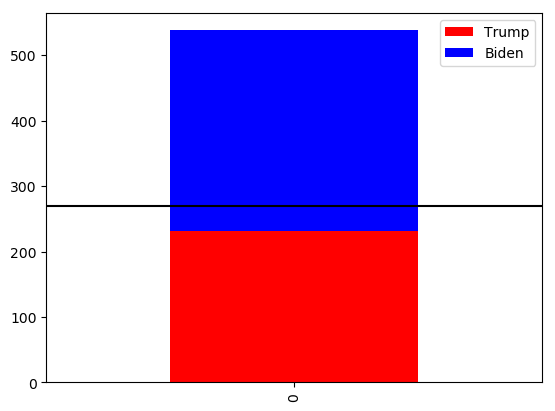

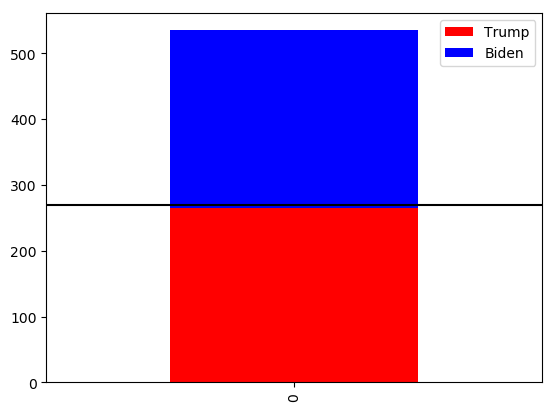

In [320]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.DataFrame([232], columns=["Trump"])
df2 = pd.DataFrame([306], columns=["Biden"])

ax = df1.plot.bar(color = 'r')
df2.plot.bar(color = 'b', bottom = df1["Trump"], ax=ax)
plt.axhline(270, color='black')

plt.show()

df3 = pd.DataFrame([265], columns=["Trump"])
df4 = pd.DataFrame([270], columns=["Biden"])

ax = df3.plot.bar(color = 'r')
df4.plot.bar(color = 'b', bottom = df3["Trump"], ax=ax)
plt.axhline(270, color='black')

plt.show()